# 人脸生成（Face Generation）
在该项目中，你将使用生成式对抗网络（Generative Adversarial Nets）来生成新的人脸图像。
### 获取数据
该项目将使用以下数据集：
- MNIST
- CelebA

由于 CelebA 数据集比较复杂，而且这是你第一次使用 GANs。我们想让你先在 MNIST 数据集上测试你的 GANs 模型，以让你更快的评估所建立模型的性能。

如果你在使用 [FloydHub](https://www.floydhub.com/), 请将 `data_dir` 设置为 "/input" 并使用 [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [29]:
data_dir = './data'

#FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## 探索数据（Explore the Data）
### MNIST
[MNIST](http://yann.lecun.com/exdb/mnist/) 是一个手写数字的图像数据集。你可以更改 `show_n_images` 探索此数据集。

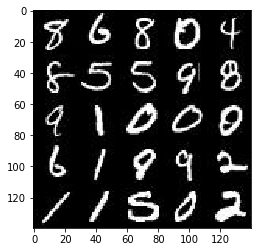

In [30]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
[CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) 是一个包含 20 多万张名人图片及相关图片说明的数据集。你将用此数据集生成人脸，不会用不到相关说明。你可以更改 `show_n_images` 探索此数据集。

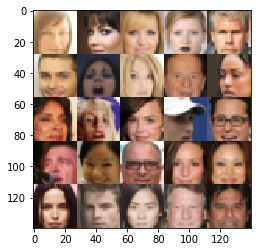

In [31]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## 预处理数据（Preprocess the Data）
由于该项目的重点是建立 GANs 模型，我们将为你预处理数据。

经过数据预处理，MNIST 和 CelebA 数据集的值在 28×28 维度图像的 [-0.5, 0.5] 范围内。CelebA 数据集中的图像裁剪了非脸部的图像部分，然后调整到 28x28 维度。

MNIST 数据集中的图像是单[通道](https://en.wikipedia.org/wiki/Channel_(digital_image%29)的黑白图像，CelebA 数据集中的图像是 [三通道的 RGB 彩色图像](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images)。

## 建立神经网络（Build the Neural Network）
你将通过部署以下函数来建立 GANs 的主要组成部分:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### 检查 TensorFlow 版本并获取 GPU 型号
检查你是否使用正确的 TensorFlow 版本，并获取 GPU 型号

In [32]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.3.0


/home/zp/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: UserWarning: No GPU found. Please use a GPU to train your neural network.
  


### 输入（Input）
部署 `model_inputs` 函数以创建用于神经网络的 [占位符 (TF Placeholders)](https://www.tensorflow.org/versions/r0.11/api_docs/python/io_ops/placeholders)。请创建以下占位符：
- 输入图像占位符: 使用 `image_width`，`image_height` 和 `image_channels` 设置为 rank 4。
- 输入 Z 占位符: 设置为 rank 2，并命名为 `z_dim`。
- 学习速率占位符: 设置为 rank 0。

返回占位符元组的形状为 (tensor of real input images, tensor of z data, learning rate)。


In [33]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    input_real = tf.placeholder(tf.float32, [None,image_width, image_height, image_channels], name="input_real")
    input_z = tf.placeholder(tf.float32, [None, z_dim], name="input_z")
    lr = tf.placeholder(tf.float32, name="learning_rate")

    return input_real, input_z, lr


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.framework.ops.Operation'>):
<tf.Operation 'assert_rank_2/Assert/Assert' type=Assert>
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
['File "/home/zp/anaconda3/lib/python3.6/runpy.py", line 193, in _run_module_as_main\n    "__main__", mod_spec)', 'File "/home/zp/anaconda3/lib/python3.6/runpy.py", line 85, in _run_code\n    exec(code, run_globals)', 'File "/home/zp/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>\n    app.launch_new_instance()', 'File "/home/zp/anaconda3/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance\n    app.start()', 'File "/home/zp/anaconda3/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 477, in start\n    ioloop.IOLoop.instance().start()', 'File "/home/zp/anaconda3/lib/python3.6/site-packages/zmq/eventloop/ioloop.py", line 177, i

### 辨别器（Discriminator）
部署 `discriminator` 函数创建辨别器神经网络以辨别 `images`。该函数应能够重复使用神经网络中的各种变量。 在 [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) 中使用 "discriminator" 的变量空间名来重复使用该函数中的变量。 

该函数应返回形如 (tensor output of the discriminator, tensor logits of the discriminator) 的元组。

In [34]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param image: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
    alpha = 0.2
    with tf.variable_scope("discriminator", reuse=reuse):
        x1 = tf.layers.conv2d(images, 64, 3, strides=2, padding="same")
        x1 = tf.maximum(alpha*x1, x1)
        #14*14*64
        
        x2 = tf.layers.conv2d(x1, 128, 3, strides=1, padding="same")
        x2 = tf.layers.batch_normalization(x2, training=True)
        x2 = tf.maximum(alpha*x2, x2)
        #14*14*128
        
        x3 = tf.layers.conv2d(x2, 256, 3, strides=2, padding="same")
        x3 = tf.layers.batch_normalization(x3, training=True)
        x3 = tf.maximum(alpha*x3, x3)
        #7*7*256
        
        x4 = tf.reshape(x3, (-1, 7*7*256))
        logits = tf.layers.dense(x4, 1)
        out = tf.sigmoid(logits)

    return out, logits



"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### 生成器（Generator）
部署 `generator` 函数以使用 `z` 生成图像。该函数应能够重复使用神经网络中的各种变量。
在 [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) 中使用 "generator" 的变量空间名来重复使用该函数中的变量。 

该函数应返回所生成的 28 x 28 x `out_channel_dim` 维度图像。

In [35]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    alpha = 0.2
    with tf.variable_scope("generator", reuse=not is_train):
        x1 = tf.layers.dense(z, 7*7*512)
        x1 = tf.reshape(x1, (-1, 7, 7, 512))
        x1 = tf.layers.batch_normalization(x1, training=is_train)
        x1 = tf.maximum(alpha*x1, x1)
        #7*7*512
    
        x2 = tf.layers.conv2d_transpose(x1, 256, 3, strides=1, padding="same")
        x2 = tf.layers.batch_normalization(x2, training=is_train)
        x2 = tf.maximum(alpha*x1, x1)
        #7*7*256
    
        x3 = tf.layers.conv2d_transpose(x2, 128, 3, strides=2, padding="same")
        x3 = tf.layers.batch_normalization(x3, training=is_train)
        x3 = tf.maximum(alpha*x3, x3)
        #14*14*128
    
        logits = tf.layers.conv2d_transpose(x3, out_channel_dim, 3, strides=2, padding="same")
        output = tf.tanh(logits)
    
        return output


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### 损失函数（Loss）
部署 `model_loss` 函数训练并计算 GANs 的损失。该函数应返回形如 (discriminator loss, generator loss) 的元组。

使用你已实现的函数：
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [36]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    g_model = generator(input_z, out_channel_dim, is_train=True)
    d_model_real, d_logits_real = discriminator(input_real, reuse=False)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse=True)
    
    g_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.ones_like(d_model_fake)))
    d_loss_real = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, labels=tf.ones_like(d_model_real)))
    d_loss_fake = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.zeros_like(d_model_fake)))
    d_loss = d_loss_real + d_loss_fake
    
    return g_loss, d_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### 优化（Optimization）
部署 `model_opt` 函数实现对 GANs 的优化。使用 [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) 获取可训练的所有变量。通过变量空间名 `discriminator` 和 `generator` 来过滤变量。该函数应返回形如 (discriminator training operation, generator training operation) 的元组。

In [37]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    t_var = tf.trainable_variables()
    g_var = [var for var in t_var if var.name.startswith("generator")]
    d_var = [var for var in t_var if var.name.startswith("discriminator")]
    
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        d_train_opt = tf.train.AdamOptimizer(learning_rate, beta1).minimize(d_loss, var_list=d_var)
        g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1).minimize(g_loss, var_list=g_var)
    
    return d_train_opt, g_train_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## 训练神经网络（Neural Network Training）
### 输出显示
使用该函数可以显示生成器 (Generator) 在训练过程中的当前输出，这会帮你评估 GANs 模型的训练程度。

In [38]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### 训练
部署 `train` 函数以建立并训练 GANs 模型。记得使用以下你已完成的函数：
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

使用 `show_generator_output` 函数显示 `generator` 在训练过程中的输出。

**注意**：在每个批次 (batch) 中运行 `show_generator_output` 函数会显著增加训练时间与该 notebook 的体积。推荐每 100 批次输出一次 `generator` 的输出。 

In [39]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    print_every = 10
    show_every = 100
    step = 0
    
    samples, width, height, channels = data_shape
    
    input_real, input_z, lr = model_inputs(width, height, channels, z_dim)
    g_loss, d_loss = model_loss(input_real, input_z, channels)
    d_train_opt, g_train_opt = model_opt(d_loss, g_loss, lr, beta1)
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                # TODO: Train Model
                step += 1
                # TODO: Train Model
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))
                batch_images = batch_images * 2.0
                
                sess.run(d_train_opt, feed_dict={input_real: batch_images, input_z: batch_z, lr: learning_rate})
                sess.run(g_train_opt, feed_dict={input_real: batch_images, input_z: batch_z, lr: learning_rate})
                
                if step % print_every == 0:
                    train_loss_d = d_loss.eval({input_real: batch_images, input_z: batch_z})
                    train_loss_g = g_loss.eval({input_z: batch_z})
                    
                    print("Epoch {}/{}...".format(epoch_i+1, epoch_count),
                         "Discriminator Loss:{:.4f}...".format(train_loss_d),
                         "Generator Loss:{:.4f}...".format(train_loss_g))
                if step % show_every == 0:
                    show_generator_output(sess, 16, input_z, channels, data_image_mode)

                

### MNIST
在 MNIST 上测试你的 GANs 模型。经过 2 次迭代，GANs 应该能够生成类似手写数字的图像。确保生成器 (generator) 低于辨别器 (discriminator) 的损失，或接近 0。

Epoch 1/2... Discriminator Loss:1.5913... Generator Loss:0.3127...
Epoch 1/2... Discriminator Loss:0.7836... Generator Loss:0.7843...
Epoch 1/2... Discriminator Loss:0.5063... Generator Loss:1.1643...
Epoch 1/2... Discriminator Loss:0.4588... Generator Loss:1.2451...
Epoch 1/2... Discriminator Loss:0.3832... Generator Loss:1.4830...
Epoch 1/2... Discriminator Loss:0.2347... Generator Loss:2.0000...
Epoch 1/2... Discriminator Loss:0.3257... Generator Loss:1.5452...
Epoch 1/2... Discriminator Loss:0.1954... Generator Loss:2.1756...
Epoch 1/2... Discriminator Loss:0.2483... Generator Loss:1.8650...
Epoch 1/2... Discriminator Loss:2.1372... Generator Loss:6.6316...


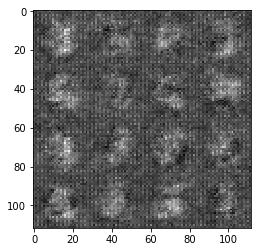

Epoch 1/2... Discriminator Loss:0.3020... Generator Loss:1.8866...
Epoch 1/2... Discriminator Loss:0.3461... Generator Loss:1.7757...
Epoch 1/2... Discriminator Loss:0.3578... Generator Loss:1.5137...
Epoch 1/2... Discriminator Loss:0.3553... Generator Loss:1.6636...
Epoch 1/2... Discriminator Loss:0.3486... Generator Loss:1.6824...
Epoch 1/2... Discriminator Loss:0.2968... Generator Loss:1.9058...
Epoch 1/2... Discriminator Loss:0.2848... Generator Loss:1.9513...
Epoch 1/2... Discriminator Loss:0.2864... Generator Loss:2.3634...
Epoch 1/2... Discriminator Loss:0.3009... Generator Loss:2.0056...
Epoch 1/2... Discriminator Loss:0.4543... Generator Loss:1.3315...


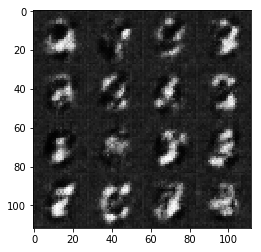

Epoch 1/2... Discriminator Loss:0.3392... Generator Loss:1.7869...
Epoch 1/2... Discriminator Loss:0.3182... Generator Loss:1.7749...
Epoch 1/2... Discriminator Loss:0.3582... Generator Loss:1.8310...
Epoch 1/2... Discriminator Loss:1.0088... Generator Loss:4.0117...
Epoch 1/2... Discriminator Loss:0.3184... Generator Loss:1.8828...
Epoch 1/2... Discriminator Loss:0.4030... Generator Loss:1.5105...
Epoch 1/2... Discriminator Loss:0.4143... Generator Loss:1.5927...
Epoch 1/2... Discriminator Loss:0.3506... Generator Loss:1.9978...
Epoch 1/2... Discriminator Loss:0.3237... Generator Loss:1.9809...
Epoch 1/2... Discriminator Loss:0.5295... Generator Loss:1.1000...


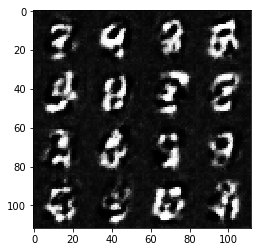

Epoch 1/2... Discriminator Loss:0.3928... Generator Loss:1.8325...
Epoch 1/2... Discriminator Loss:0.4110... Generator Loss:1.4821...
Epoch 1/2... Discriminator Loss:0.3876... Generator Loss:1.8171...
Epoch 1/2... Discriminator Loss:0.5909... Generator Loss:1.0030...
Epoch 1/2... Discriminator Loss:0.4209... Generator Loss:2.2233...
Epoch 1/2... Discriminator Loss:0.3938... Generator Loss:2.5503...
Epoch 1/2... Discriminator Loss:0.3905... Generator Loss:1.6922...
Epoch 1/2... Discriminator Loss:0.3536... Generator Loss:1.8741...
Epoch 1/2... Discriminator Loss:0.3667... Generator Loss:1.7836...
Epoch 1/2... Discriminator Loss:0.3994... Generator Loss:1.6787...


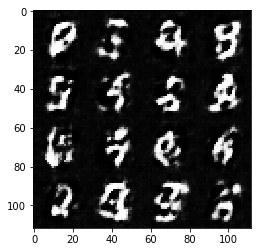

Epoch 1/2... Discriminator Loss:0.3996... Generator Loss:1.5888...
Epoch 1/2... Discriminator Loss:0.3851... Generator Loss:1.6597...
Epoch 1/2... Discriminator Loss:0.3565... Generator Loss:1.7285...
Epoch 1/2... Discriminator Loss:0.3385... Generator Loss:1.8223...
Epoch 1/2... Discriminator Loss:0.4203... Generator Loss:1.6432...
Epoch 1/2... Discriminator Loss:0.4049... Generator Loss:1.4322...
Epoch 1/2... Discriminator Loss:0.3328... Generator Loss:1.8724...
Epoch 1/2... Discriminator Loss:0.4100... Generator Loss:1.5373...
Epoch 2/2... Discriminator Loss:0.3524... Generator Loss:1.7842...
Epoch 2/2... Discriminator Loss:0.3247... Generator Loss:1.8944...


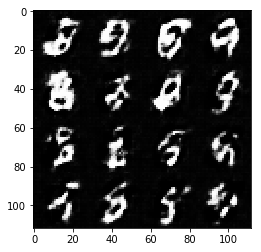

Epoch 2/2... Discriminator Loss:0.3233... Generator Loss:2.1469...
Epoch 2/2... Discriminator Loss:0.3460... Generator Loss:1.7895...
Epoch 2/2... Discriminator Loss:0.4039... Generator Loss:2.7610...
Epoch 2/2... Discriminator Loss:0.4906... Generator Loss:1.2424...
Epoch 2/2... Discriminator Loss:0.3502... Generator Loss:1.7362...
Epoch 2/2... Discriminator Loss:0.3617... Generator Loss:1.6081...
Epoch 2/2... Discriminator Loss:0.3113... Generator Loss:1.9990...
Epoch 2/2... Discriminator Loss:0.3538... Generator Loss:1.5618...
Epoch 2/2... Discriminator Loss:0.2593... Generator Loss:2.0984...
Epoch 2/2... Discriminator Loss:0.3825... Generator Loss:1.4915...


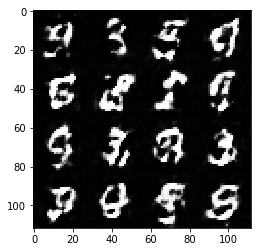

Epoch 2/2... Discriminator Loss:0.4211... Generator Loss:1.4320...
Epoch 2/2... Discriminator Loss:0.4906... Generator Loss:1.1696...
Epoch 2/2... Discriminator Loss:0.4306... Generator Loss:1.3178...
Epoch 2/2... Discriminator Loss:0.8430... Generator Loss:4.5524...
Epoch 2/2... Discriminator Loss:0.3821... Generator Loss:1.5451...
Epoch 2/2... Discriminator Loss:0.4099... Generator Loss:1.4414...
Epoch 2/2... Discriminator Loss:0.3064... Generator Loss:1.9553...
Epoch 2/2... Discriminator Loss:0.3016... Generator Loss:1.9810...
Epoch 2/2... Discriminator Loss:0.2748... Generator Loss:2.2074...
Epoch 2/2... Discriminator Loss:0.3202... Generator Loss:1.9358...


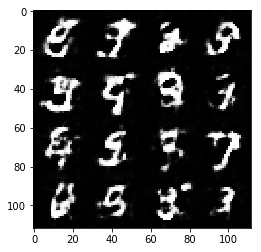

Epoch 2/2... Discriminator Loss:0.3546... Generator Loss:1.6089...
Epoch 2/2... Discriminator Loss:0.2966... Generator Loss:1.9105...
Epoch 2/2... Discriminator Loss:0.2964... Generator Loss:1.8557...
Epoch 2/2... Discriminator Loss:0.3767... Generator Loss:1.6270...
Epoch 2/2... Discriminator Loss:0.5559... Generator Loss:1.0623...
Epoch 2/2... Discriminator Loss:0.2363... Generator Loss:2.5964...
Epoch 2/2... Discriminator Loss:0.4683... Generator Loss:1.3131...
Epoch 2/2... Discriminator Loss:1.3576... Generator Loss:4.5422...
Epoch 2/2... Discriminator Loss:0.3169... Generator Loss:1.9276...
Epoch 2/2... Discriminator Loss:0.4098... Generator Loss:1.5733...


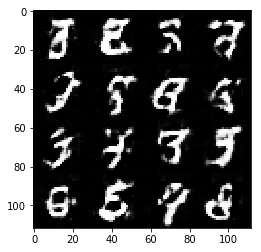

Epoch 2/2... Discriminator Loss:0.2905... Generator Loss:2.0258...
Epoch 2/2... Discriminator Loss:0.2779... Generator Loss:2.0335...
Epoch 2/2... Discriminator Loss:0.3380... Generator Loss:1.7612...
Epoch 2/2... Discriminator Loss:0.3213... Generator Loss:1.8395...
Epoch 2/2... Discriminator Loss:0.2963... Generator Loss:2.0188...
Epoch 2/2... Discriminator Loss:0.3477... Generator Loss:1.6629...
Epoch 2/2... Discriminator Loss:0.3635... Generator Loss:1.7545...
Epoch 2/2... Discriminator Loss:0.3043... Generator Loss:1.9369...
Epoch 2/2... Discriminator Loss:0.4246... Generator Loss:1.5317...
Epoch 2/2... Discriminator Loss:0.2681... Generator Loss:1.9366...


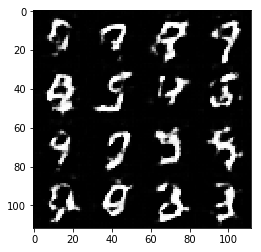

Epoch 2/2... Discriminator Loss:0.3373... Generator Loss:1.6675...
Epoch 2/2... Discriminator Loss:0.3123... Generator Loss:1.7281...
Epoch 2/2... Discriminator Loss:0.3881... Generator Loss:1.5566...
Epoch 2/2... Discriminator Loss:0.3604... Generator Loss:1.5768...
Epoch 2/2... Discriminator Loss:0.2464... Generator Loss:2.7184...
Epoch 2/2... Discriminator Loss:0.3219... Generator Loss:1.7488...
Epoch 2/2... Discriminator Loss:0.2976... Generator Loss:2.0574...


In [41]:
batch_size = 123
z_dim = 256
learning_rate = 0.0001
beta1 = 0.4


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
在 CelebA 上运行你的 GANs 模型。在一般的GPU上运行每次迭代大约需要 20 分钟。你可以运行整个迭代，或者当 GANs 开始产生真实人脸图像时停止它。

Epoch 1/1... Discriminator Loss:1.6215... Generator Loss:0.3362...
Epoch 1/1... Discriminator Loss:1.3240... Generator Loss:0.4449...
Epoch 1/1... Discriminator Loss:1.0570... Generator Loss:0.6037...
Epoch 1/1... Discriminator Loss:0.8323... Generator Loss:0.8237...
Epoch 1/1... Discriminator Loss:0.7536... Generator Loss:0.9302...
Epoch 1/1... Discriminator Loss:0.6036... Generator Loss:1.2323...
Epoch 1/1... Discriminator Loss:0.5043... Generator Loss:1.2934...
Epoch 1/1... Discriminator Loss:0.2897... Generator Loss:1.9386...
Epoch 1/1... Discriminator Loss:0.3416... Generator Loss:1.6082...
Epoch 1/1... Discriminator Loss:0.3206... Generator Loss:1.8406...


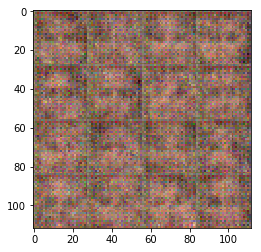

Epoch 1/1... Discriminator Loss:0.6233... Generator Loss:1.0513...
Epoch 1/1... Discriminator Loss:0.6195... Generator Loss:1.3389...
Epoch 1/1... Discriminator Loss:0.9994... Generator Loss:0.7048...
Epoch 1/1... Discriminator Loss:1.2404... Generator Loss:0.4707...
Epoch 1/1... Discriminator Loss:0.9041... Generator Loss:1.6844...
Epoch 1/1... Discriminator Loss:1.0934... Generator Loss:2.1674...
Epoch 1/1... Discriminator Loss:0.8776... Generator Loss:1.0265...
Epoch 1/1... Discriminator Loss:0.8235... Generator Loss:1.1401...
Epoch 1/1... Discriminator Loss:0.8482... Generator Loss:1.0165...
Epoch 1/1... Discriminator Loss:0.8426... Generator Loss:1.4893...


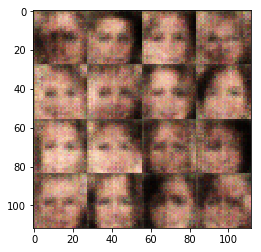

Epoch 1/1... Discriminator Loss:0.6008... Generator Loss:1.6378...
Epoch 1/1... Discriminator Loss:0.9315... Generator Loss:0.8289...
Epoch 1/1... Discriminator Loss:0.8666... Generator Loss:1.5772...
Epoch 1/1... Discriminator Loss:0.5635... Generator Loss:1.3597...
Epoch 1/1... Discriminator Loss:0.8505... Generator Loss:1.0064...
Epoch 1/1... Discriminator Loss:0.8402... Generator Loss:2.0281...
Epoch 1/1... Discriminator Loss:1.2962... Generator Loss:0.4707...
Epoch 1/1... Discriminator Loss:1.0262... Generator Loss:0.6243...
Epoch 1/1... Discriminator Loss:1.0286... Generator Loss:1.2143...
Epoch 1/1... Discriminator Loss:0.9138... Generator Loss:0.9444...


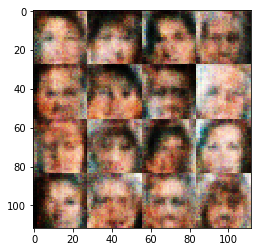

Epoch 1/1... Discriminator Loss:1.7329... Generator Loss:0.2974...
Epoch 1/1... Discriminator Loss:1.0916... Generator Loss:1.3991...
Epoch 1/1... Discriminator Loss:0.9564... Generator Loss:1.4700...
Epoch 1/1... Discriminator Loss:0.8495... Generator Loss:0.9170...
Epoch 1/1... Discriminator Loss:0.9706... Generator Loss:1.0738...
Epoch 1/1... Discriminator Loss:0.8775... Generator Loss:1.0715...
Epoch 1/1... Discriminator Loss:1.1064... Generator Loss:0.6134...
Epoch 1/1... Discriminator Loss:0.8637... Generator Loss:1.5210...
Epoch 1/1... Discriminator Loss:1.0488... Generator Loss:1.6964...
Epoch 1/1... Discriminator Loss:1.0834... Generator Loss:0.7135...


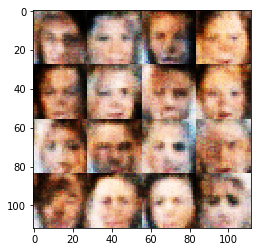

Epoch 1/1... Discriminator Loss:0.9031... Generator Loss:1.2587...
Epoch 1/1... Discriminator Loss:0.9979... Generator Loss:0.9656...
Epoch 1/1... Discriminator Loss:0.8481... Generator Loss:1.1025...
Epoch 1/1... Discriminator Loss:0.8380... Generator Loss:0.9333...
Epoch 1/1... Discriminator Loss:0.7171... Generator Loss:1.0482...
Epoch 1/1... Discriminator Loss:0.9336... Generator Loss:1.1892...
Epoch 1/1... Discriminator Loss:0.7631... Generator Loss:1.2619...
Epoch 1/1... Discriminator Loss:0.8755... Generator Loss:0.7167...
Epoch 1/1... Discriminator Loss:0.7643... Generator Loss:1.1844...
Epoch 1/1... Discriminator Loss:0.8717... Generator Loss:1.9855...


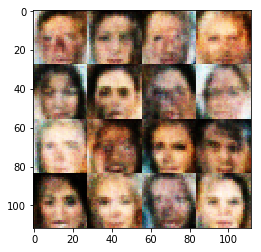

Epoch 1/1... Discriminator Loss:1.1382... Generator Loss:0.5466...
Epoch 1/1... Discriminator Loss:0.7219... Generator Loss:1.3203...
Epoch 1/1... Discriminator Loss:0.7053... Generator Loss:1.3395...
Epoch 1/1... Discriminator Loss:0.6724... Generator Loss:1.4126...
Epoch 1/1... Discriminator Loss:0.6931... Generator Loss:1.2738...
Epoch 1/1... Discriminator Loss:0.5842... Generator Loss:1.4008...
Epoch 1/1... Discriminator Loss:0.5917... Generator Loss:1.9266...
Epoch 1/1... Discriminator Loss:0.8640... Generator Loss:1.1791...
Epoch 1/1... Discriminator Loss:0.6034... Generator Loss:1.3012...
Epoch 1/1... Discriminator Loss:0.8110... Generator Loss:1.9484...


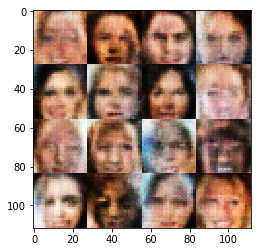

Epoch 1/1... Discriminator Loss:0.6671... Generator Loss:1.4329...
Epoch 1/1... Discriminator Loss:0.5272... Generator Loss:1.5513...
Epoch 1/1... Discriminator Loss:0.8812... Generator Loss:0.7088...
Epoch 1/1... Discriminator Loss:1.2820... Generator Loss:0.4397...
Epoch 1/1... Discriminator Loss:0.8893... Generator Loss:0.8003...
Epoch 1/1... Discriminator Loss:0.8842... Generator Loss:0.8636...
Epoch 1/1... Discriminator Loss:0.6112... Generator Loss:2.3205...
Epoch 1/1... Discriminator Loss:0.8811... Generator Loss:0.7583...
Epoch 1/1... Discriminator Loss:0.8318... Generator Loss:1.9605...
Epoch 1/1... Discriminator Loss:0.5057... Generator Loss:1.4557...


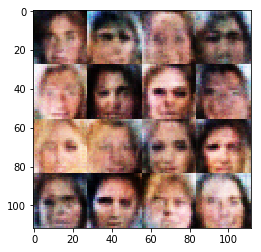

Epoch 1/1... Discriminator Loss:0.7988... Generator Loss:1.0965...
Epoch 1/1... Discriminator Loss:0.6014... Generator Loss:1.3650...
Epoch 1/1... Discriminator Loss:0.7528... Generator Loss:1.3381...
Epoch 1/1... Discriminator Loss:0.7559... Generator Loss:1.2274...
Epoch 1/1... Discriminator Loss:0.7273... Generator Loss:1.1008...
Epoch 1/1... Discriminator Loss:0.6048... Generator Loss:1.3999...
Epoch 1/1... Discriminator Loss:0.8022... Generator Loss:1.5924...
Epoch 1/1... Discriminator Loss:0.6219... Generator Loss:1.4520...
Epoch 1/1... Discriminator Loss:0.5459... Generator Loss:2.1467...
Epoch 1/1... Discriminator Loss:1.2441... Generator Loss:1.9639...


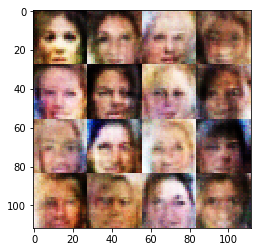

Epoch 1/1... Discriminator Loss:1.0402... Generator Loss:1.0860...
Epoch 1/1... Discriminator Loss:0.7244... Generator Loss:1.5752...
Epoch 1/1... Discriminator Loss:0.7708... Generator Loss:0.9812...
Epoch 1/1... Discriminator Loss:0.9721... Generator Loss:1.2279...
Epoch 1/1... Discriminator Loss:1.0759... Generator Loss:0.6349...
Epoch 1/1... Discriminator Loss:1.0097... Generator Loss:1.0894...
Epoch 1/1... Discriminator Loss:0.7314... Generator Loss:1.7664...
Epoch 1/1... Discriminator Loss:0.9378... Generator Loss:0.8317...
Epoch 1/1... Discriminator Loss:0.9152... Generator Loss:1.0271...
Epoch 1/1... Discriminator Loss:1.0002... Generator Loss:1.6895...


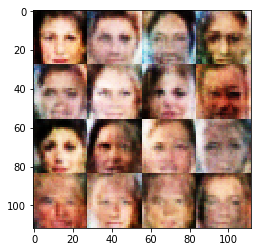

Epoch 1/1... Discriminator Loss:0.5638... Generator Loss:1.9576...
Epoch 1/1... Discriminator Loss:0.9887... Generator Loss:1.5866...
Epoch 1/1... Discriminator Loss:0.8938... Generator Loss:0.9322...
Epoch 1/1... Discriminator Loss:0.9126... Generator Loss:1.0825...
Epoch 1/1... Discriminator Loss:1.2736... Generator Loss:0.4755...
Epoch 1/1... Discriminator Loss:0.8676... Generator Loss:1.3181...
Epoch 1/1... Discriminator Loss:0.7565... Generator Loss:1.2026...
Epoch 1/1... Discriminator Loss:0.9380... Generator Loss:0.7648...
Epoch 1/1... Discriminator Loss:1.3526... Generator Loss:0.4352...
Epoch 1/1... Discriminator Loss:1.1547... Generator Loss:1.2145...


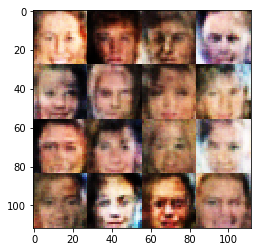

Epoch 1/1... Discriminator Loss:0.8224... Generator Loss:1.4164...
Epoch 1/1... Discriminator Loss:1.1367... Generator Loss:0.6001...
Epoch 1/1... Discriminator Loss:1.3000... Generator Loss:0.4795...
Epoch 1/1... Discriminator Loss:1.1989... Generator Loss:0.7827...
Epoch 1/1... Discriminator Loss:1.4221... Generator Loss:0.3764...
Epoch 1/1... Discriminator Loss:1.2312... Generator Loss:0.5411...
Epoch 1/1... Discriminator Loss:1.0921... Generator Loss:0.9317...
Epoch 1/1... Discriminator Loss:0.9839... Generator Loss:1.2445...
Epoch 1/1... Discriminator Loss:0.9019... Generator Loss:1.0045...
Epoch 1/1... Discriminator Loss:0.9463... Generator Loss:1.0402...


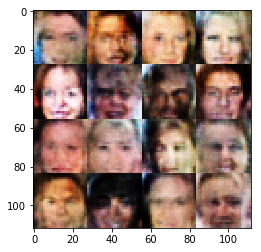

Epoch 1/1... Discriminator Loss:1.0203... Generator Loss:1.6357...
Epoch 1/1... Discriminator Loss:1.1889... Generator Loss:1.3575...
Epoch 1/1... Discriminator Loss:1.3102... Generator Loss:0.4898...
Epoch 1/1... Discriminator Loss:1.2855... Generator Loss:0.4973...
Epoch 1/1... Discriminator Loss:1.2238... Generator Loss:1.2526...
Epoch 1/1... Discriminator Loss:1.1920... Generator Loss:0.6229...
Epoch 1/1... Discriminator Loss:1.1177... Generator Loss:0.6810...
Epoch 1/1... Discriminator Loss:1.2005... Generator Loss:1.2189...
Epoch 1/1... Discriminator Loss:1.2515... Generator Loss:0.4864...
Epoch 1/1... Discriminator Loss:0.9819... Generator Loss:1.0797...


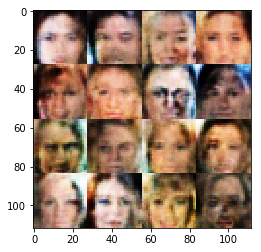

Epoch 1/1... Discriminator Loss:0.9431... Generator Loss:0.8451...
Epoch 1/1... Discriminator Loss:1.5267... Generator Loss:0.3160...
Epoch 1/1... Discriminator Loss:1.2626... Generator Loss:1.1110...
Epoch 1/1... Discriminator Loss:1.1171... Generator Loss:0.7908...
Epoch 1/1... Discriminator Loss:0.9466... Generator Loss:0.9831...
Epoch 1/1... Discriminator Loss:1.4263... Generator Loss:1.4859...
Epoch 1/1... Discriminator Loss:1.0496... Generator Loss:1.0526...
Epoch 1/1... Discriminator Loss:1.0534... Generator Loss:0.7847...
Epoch 1/1... Discriminator Loss:0.8388... Generator Loss:1.0856...
Epoch 1/1... Discriminator Loss:1.6276... Generator Loss:0.3015...


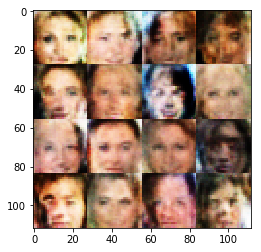

Epoch 1/1... Discriminator Loss:1.0805... Generator Loss:1.1848...
Epoch 1/1... Discriminator Loss:1.0835... Generator Loss:1.1647...
Epoch 1/1... Discriminator Loss:1.2968... Generator Loss:0.5195...
Epoch 1/1... Discriminator Loss:1.2130... Generator Loss:0.5681...
Epoch 1/1... Discriminator Loss:0.9526... Generator Loss:0.6931...
Epoch 1/1... Discriminator Loss:0.6922... Generator Loss:1.2710...
Epoch 1/1... Discriminator Loss:1.2431... Generator Loss:0.4583...
Epoch 1/1... Discriminator Loss:1.2917... Generator Loss:0.5086...
Epoch 1/1... Discriminator Loss:0.7948... Generator Loss:2.1024...
Epoch 1/1... Discriminator Loss:0.9089... Generator Loss:2.8666...


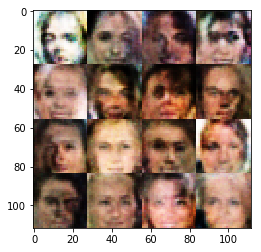

Epoch 1/1... Discriminator Loss:1.7928... Generator Loss:0.2538...
Epoch 1/1... Discriminator Loss:1.6815... Generator Loss:0.2961...
Epoch 1/1... Discriminator Loss:1.0459... Generator Loss:0.6830...
Epoch 1/1... Discriminator Loss:0.8093... Generator Loss:1.1621...
Epoch 1/1... Discriminator Loss:0.9565... Generator Loss:0.7339...
Epoch 1/1... Discriminator Loss:0.7512... Generator Loss:1.1012...
Epoch 1/1... Discriminator Loss:0.5336... Generator Loss:2.4600...
Epoch 1/1... Discriminator Loss:0.5395... Generator Loss:1.8822...
Epoch 1/1... Discriminator Loss:0.4920... Generator Loss:1.4397...
Epoch 1/1... Discriminator Loss:1.2389... Generator Loss:0.4680...


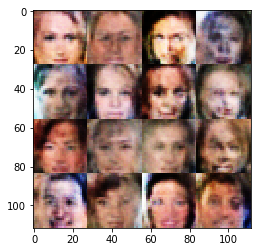

Epoch 1/1... Discriminator Loss:0.3870... Generator Loss:2.1376...
Epoch 1/1... Discriminator Loss:1.0447... Generator Loss:0.6927...
Epoch 1/1... Discriminator Loss:0.6566... Generator Loss:1.5402...
Epoch 1/1... Discriminator Loss:1.1363... Generator Loss:0.5005...
Epoch 1/1... Discriminator Loss:1.8618... Generator Loss:0.2275...
Epoch 1/1... Discriminator Loss:0.8849... Generator Loss:1.8907...
Epoch 1/1... Discriminator Loss:0.5229... Generator Loss:2.9263...
Epoch 1/1... Discriminator Loss:1.1488... Generator Loss:2.1786...


In [42]:
batch_size = 128
z_dim = 256
learning_rate = 0.0001
beta1 = 0.4


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### 提交项目
提交本项目前，确保运行所有 cells 后保存该文件。

保存该文件为 "dlnd_face_generation.ipynb"， 并另存为 HTML 格式 "File" -> "Download as"。提交项目时请附带 "helper.py" 和 "problem_unittests.py" 文件。